<a href="https://colab.research.google.com/github/alvianputrap/clustering/blob/master/clustering_mallcustomersegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Task - Telkom Digital Incubator*


---




# **Clustering**

Analisis cluster atau pengelompokan adalah tugas mengelompokkan sekumpulan objek sedemikian rupa sehingga objek dalam grup yang sama (disebut cluster) lebih mirip (dalam beberapa hal) satu sama lain dibandingkan dengan objek di grup lain.(clusters).

Di sini kami memodelkan pengelompokan Mall Customer Segmentation data. Kami menggunakan model ini untuk melakukan segmentasi pelanggan. Kami membedakan pelanggan menjadi jumlah grup yang optimal.

### **Import Libraries**

Pertama, import libraries

In [4]:
# Import Libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')

### **Import Raw Dataset**

Selanjutnya, mengimport raw data set mengenai "Mall Customer Segmentation".

In [11]:
# Import Dataset
df = pd.read_csv ('https://raw.githubusercontent.com/alvianputrap/clustering/master/Mall_Customers.csv' , sep = ',')
df_customer = df

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Prints the Dataset Information
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
# Prints Descriptive Statistics
df_customer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [16]:
# Prints Point Decriptive
df.describe(include=['O'])

,Gender
count,200
unique,2
top,Female
freq,112


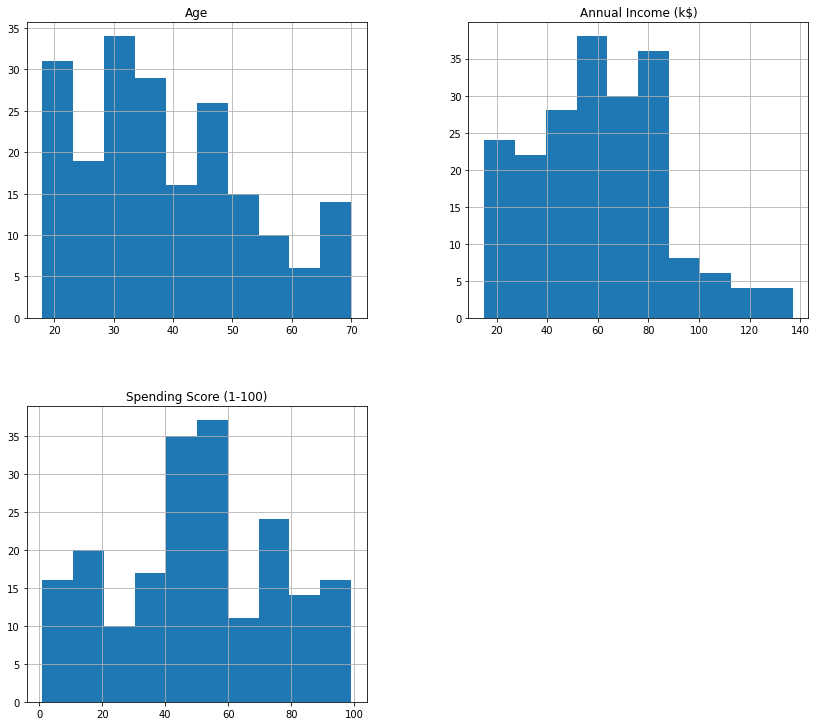

In [28]:
# Graphic plot berdasarkan CustomerID
df.drop(['CustomerID'],axis=1).hist(figsize=(14,12.5))
plt.show()

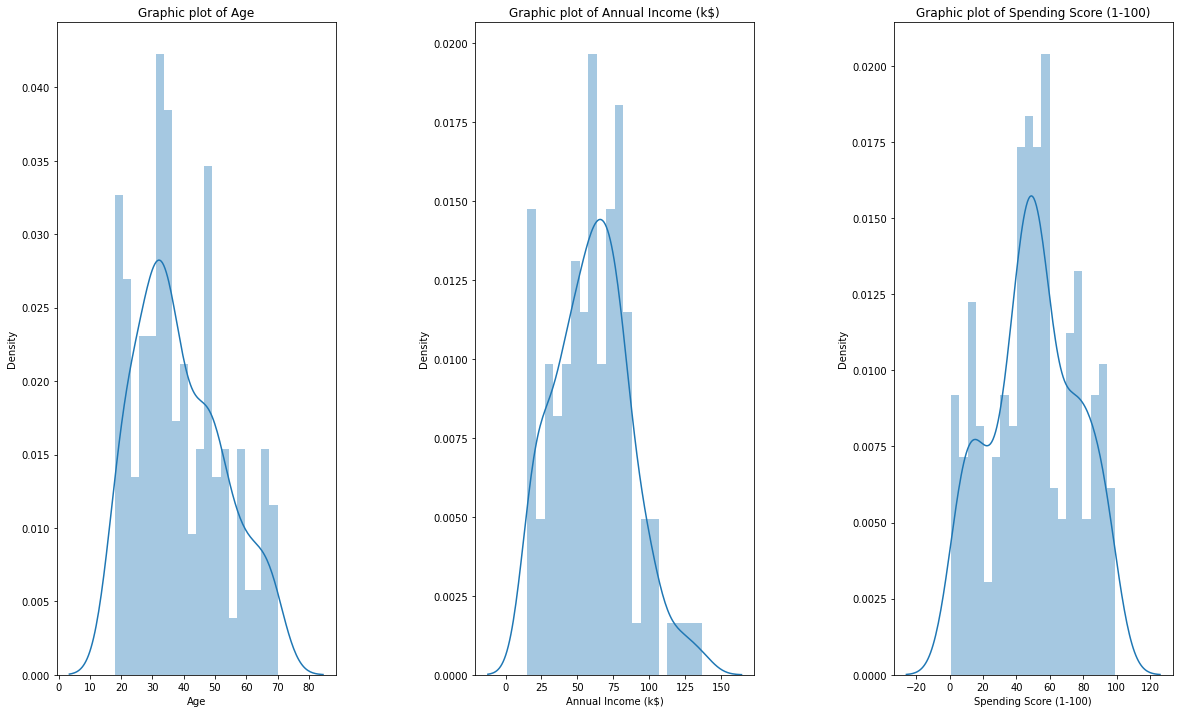

In [48]:
plt.figure(1 , figsize = (20 , 12))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_customer[x] , bins = 20)
    plt.title('Graphic plot of {}'.format(x))
plt.show()

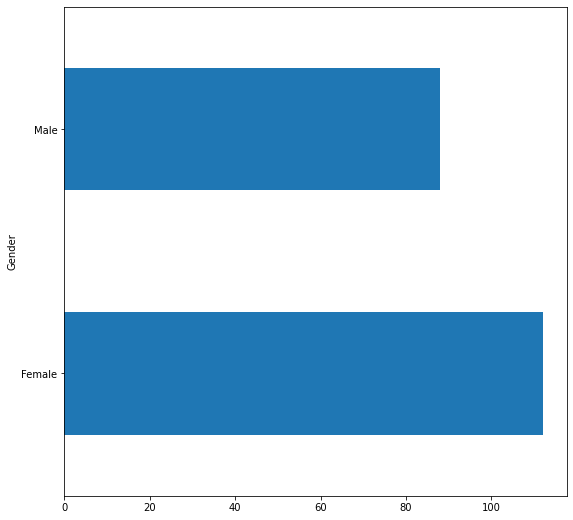

In [55]:
# Graphic plot berdasarkan "gender"
df.groupby(['Gender']).size().plot(kind='barh')

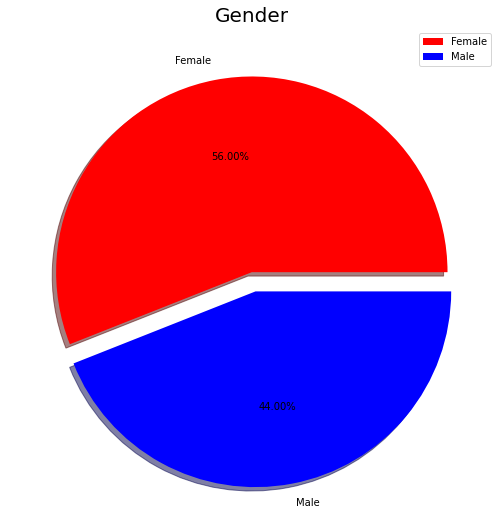

In [56]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

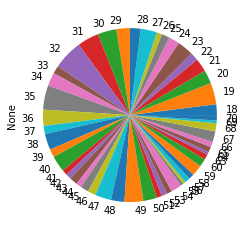

In [51]:
# Graphic pie plot berdasarkan "age"
df.groupby(['Age']).size().plot(kind='pie')

### **Data Preprocessing**

Kami menyamakan variabilitas data.
Standarisasi fitur menjadikan nilai setiap fitur dalam data memiliki mean nol (saat mengurangkan mean di pembilang) dan unit-varians.

In [64]:
# Importing Encoder Module 
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Gender']]))
df_encoded.columns = encoder.get_feature_names(['Gender'])

# Replace Categotical Data with Encoded Data
df.drop(['Gender'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_customer, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoder = df_encoded
df_encoder

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0
...,...,...,...,...,...,...
195,196,35,120,79,1.0,0.0
196,197,45,126,28,1.0,0.0
197,198,32,126,74,0.0,1.0
198,199,32,137,18,0.0,1.0


In [71]:
df_ClusterCustomer = df.drop(['CustomerID'], axis=1)
df_ClusterCustomer.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [74]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_customer.columns.tolist()
df_customer[column_names] = scaler.fit_transform(df_customer[column_names])
df_customer.sort_index(inplace=True)
df_customer

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


In [75]:
scaler = StandardScaler()
df_ClusterCustomer = scaler.fit_transform(df_ClusterCustomer)

### **Data Visualization**

Text(0, 0.5, 'Spending Score (1-100)')

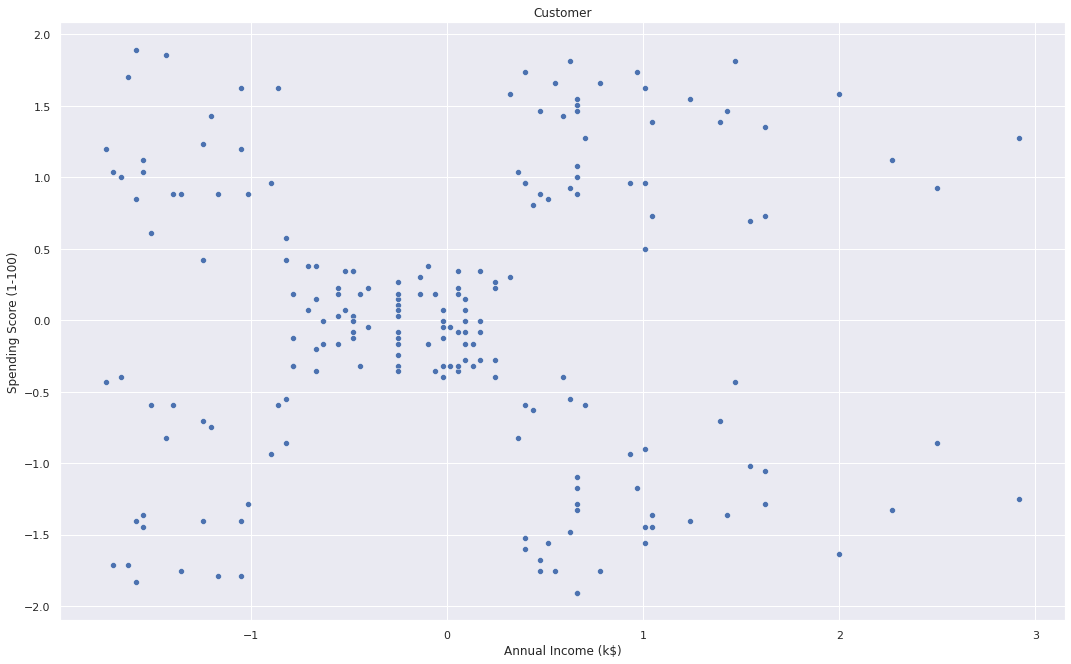

In [78]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (18, 11)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df)
plt.title('Customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## **K-Means Clustering**

Kmeans algorithm adalah algoritme berulang yang mencoba mempartisi kumpulan data menjadi subkelompok (cluster) tidak tumpang tindih berbeda yang ditentukan sebelumnya oleh Kp di mana setiap titik data hanya dimiliki oleh satu grup. Ini mencoba untuk membuat titik data antar cluster semirip mungkin sambil juga menjaga cluster sejauh mungkin. Ini menetapkan poin data ke cluster sedemikian rupa sehingga jumlah jarak kuadrat antara titik data dan pusat massa cluster (rata-rata aritmatika dari semua titik data yang termasuk dalam cluster itu) minimal. Semakin sedikit variasi yang kita miliki dalam cluster, semakin homogen (serupa) titik data dalam cluster yang sama.

### **Search for the Optimum Number of Clusters (k)**

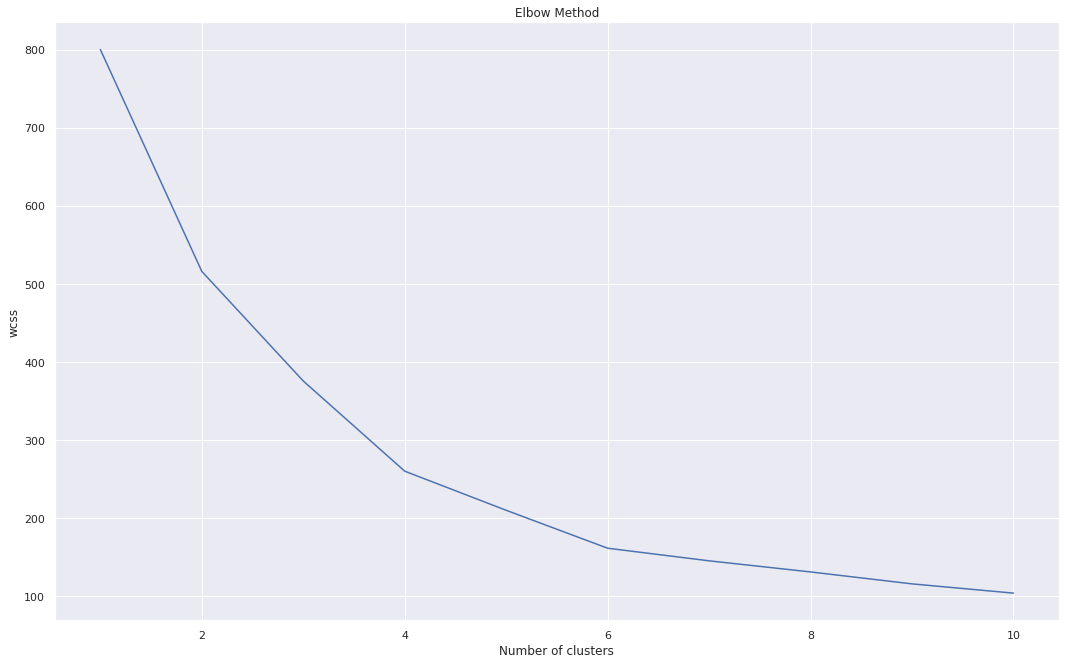

In [114]:
# Transform Data Frame to Numpy Array
segmentation_mall = df.to_numpy()
segmentation_mall = income
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=350, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [115]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3185134408711024
For n_clusters=3, The Silhouette Coefficient is 0.3375693760556384
For n_clusters=4, The Silhouette Coefficient is 0.41358360614845524
For n_clusters=5, The Silhouette Coefficient is 0.4272395443393026
For n_clusters=6, The Silhouette Coefficient is 0.4390404164555763
For n_clusters=7, The Silhouette Coefficient is 0.40604098901072594
For n_clusters=8, The Silhouette Coefficient is 0.40506665384208035
For n_clusters=9, The Silhouette Coefficient is 0.3792888372414788
For n_clusters=10, The Silhouette Coefficient is 0.3806629413511521


### **Modeling K-Means**

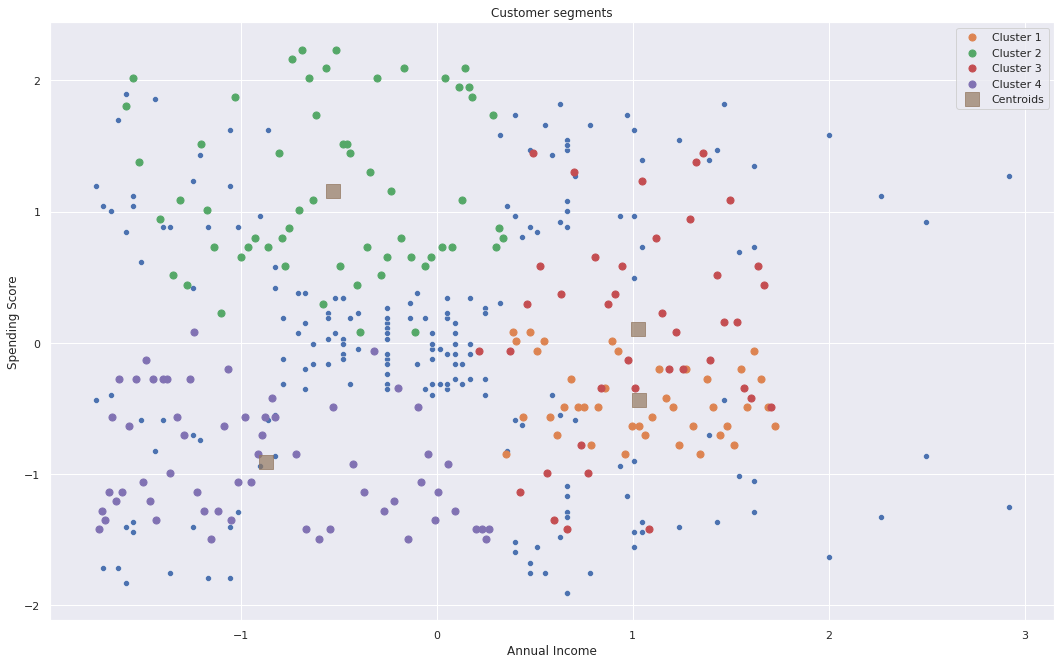

In [130]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters berdasarkan karakteristik 'Annual Income (K$)' dan 'Spending Score (1-100)'
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[cluster == 3, 0], income[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

setelah melakukan visualisasi maka diketahui cluster dan centroidsnya, dilihat berdasarkan dari karakteristik dari annual income dan spending scorenya

In [141]:
# Add Cluster Information to the Raw Data
df['cluster'] = cluster
cluster
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.723412,-1.424569,-1.738999,-0.434801,3
1,-1.706091,-1.281035,-1.738999,1.195704,3
2,-1.688771,-1.352802,-1.700830,-1.715913,3
3,-1.671450,-1.137502,-1.700830,1.040418,3
4,-1.654129,-0.563369,-1.662660,-0.395980,3
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,0
196,1.671450,0.441365,2.497807,-0.861839,2
197,1.688771,-0.491602,2.497807,0.923953,0
198,1.706091,-0.491602,2.917671,-1.250054,2


In [118]:
# Save= Result
df.to_csv('income_clusters.csv', index=False)

## **Hierarchical Clustering**

Pengelompokan hierarki (juga disebut analisis klaster hierarki atau HCA) adalah metode analisis klaster yang berupaya membangun hierarki klaster. Endpoint adalah sekumpulan cluster, di mana setiap cluster berbeda satu sama lain, dan objek dalam setiap cluster secara luas mirip satu sama lain.

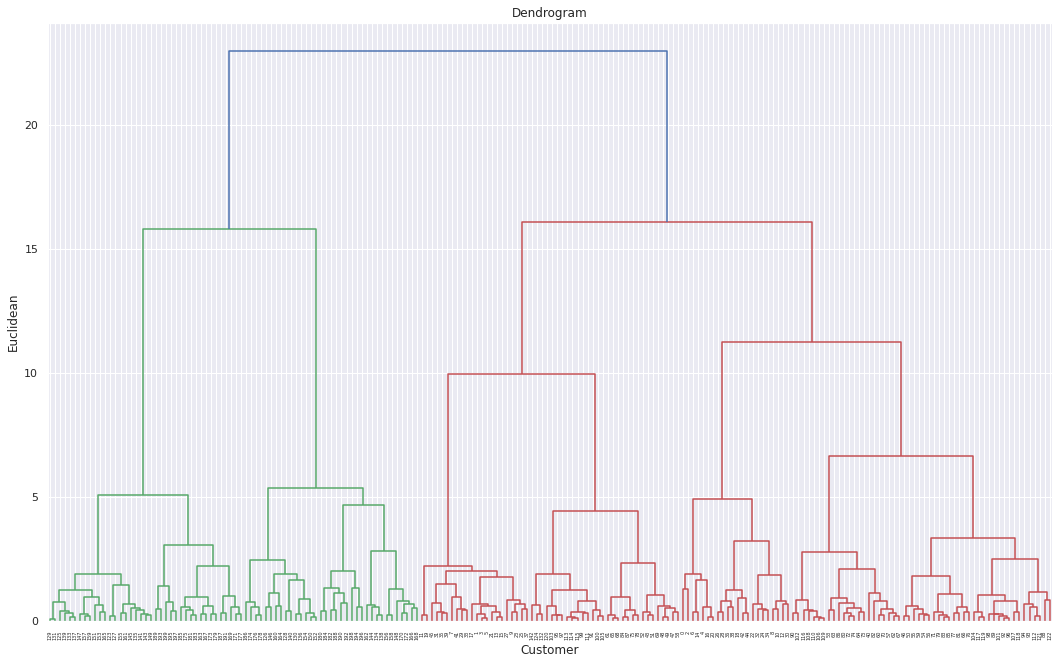

In [119]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

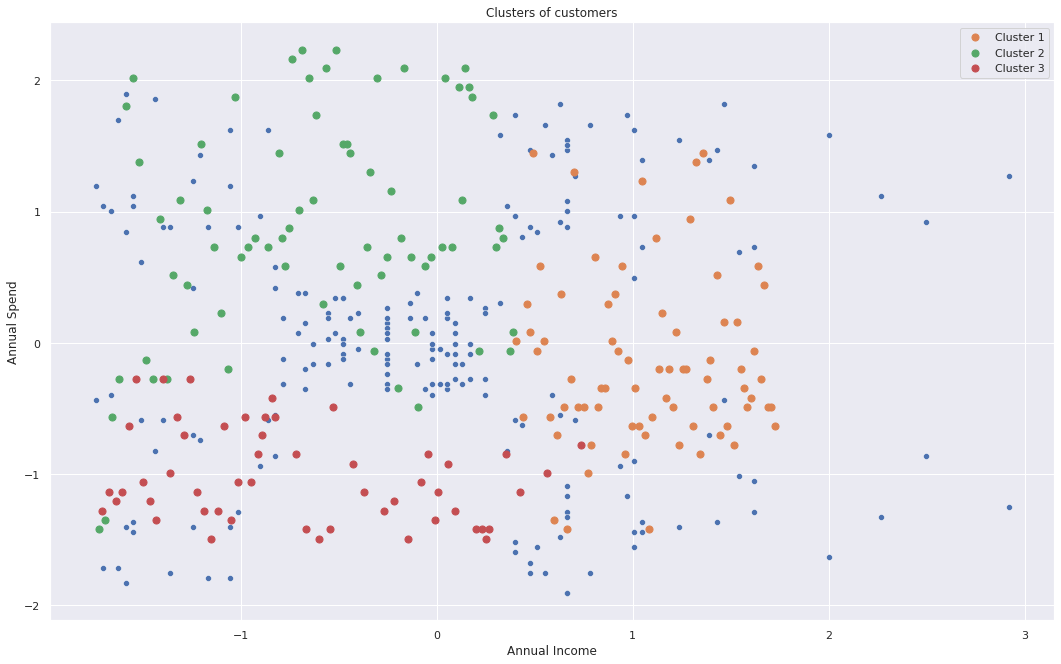

In [143]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[hcluster == 2, 0], income[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()

Visualisasi Hierarki model menunjukkan cluster. setiap cluster merupakan hasil dari karakteristik data annual income dan nilai spending score customer.